<img src = "C:\Users\Nikhil Mathur\Documents\Documents\Data Science\imdb.jpg">

<center> <h3> IMDB Movie Score Prediction Project for Introduction to Data Science 
By Nikhil Mathur </h3> </center>

In [111]:
import math
import numpy as np
from numpy import mean
import pandas
import csv
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

%matplotlib inline

<h1>__Analysis and Visualization__</h1>

In [112]:
#Reading and printing CSV File
data = pandas.read_csv('movie_metadata_new.csv')

In [113]:
#Remove duplicates
data = data.drop_duplicates('movie_title')

__Now, we must drop data that may be a "Bias" for the score prediction.__ 

In [114]:
data = data.drop(["movie_imdb_link","content_rating","plot_keywords", "director_name",
                 "actor_1_name","actor_2_name","actor_3_name","movie_title","color","country","language"],axis=1)
data.shape

(4917, 17)

In [115]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000,7.9
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0,7.1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000,6.8
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000,8.5
4,NaN,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,0.0,NaN,NaN,NaN,12.0,NaN,0,7.1


For an accurate analysis, we want to drop any data elements that have missing values in order for consistency.

In [116]:
#Remove elements with missing data
data = data.dropna()
data.shape

(3700, 17)

In [117]:
data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'imdb_score'],
      dtype='object')

In [118]:
#We can infer that genres in an important factor when it comes to imdb scores.
#I incorporate my own one-hot encoder in order to map the different genres to a 0 or 1 value. 
genres = data["genres"]
gen_li = list(x.split("|") for x in genres)
all_list = list(set([i for item in gen_li for i in item]))

In [119]:
for item in all_list:
    li = []
    for i in range(0,len(gen_li)):
        if item in gen_li[i]:
            li.append(1.0)
        else:
            li.append(0.0)
    data[item] = li

In [120]:
#Now that every genre is its own column, we can drop the genres attribute.
data = data.drop(["genres"],axis=1)

In [121]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Romance,Horror,History,Action,Film-Noir,Animation,Sport,Mystery,War,Family
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# col = data["genres"]
# li = list(set(col))
# dic = {li[i] : i for i in range(0,len(li))}
# c = list(dic[col[i]] for i in range(0,len(col)))
# data['director_name'] = c
# data.shape

<h2> <center>__Which factors influence the movie ratings?__ </h2> 
Looking at the table, we can assume: <br />
director_facebook_likes, movie_facebook_likes, num_user_for_reviews, actor_1_name, actor_2_name, actor_3_name, budget
cast_total_facebook_likes, num_voted_users, num_critic_for_reviews, num_user_for_reviews, movie_facebook_likes, gross


In [123]:
#Get relationship between columns - pearson computes the standard correlation coefficient
data.corr(method="pearson")

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Romance,Horror,History,Action,Film-Noir,Animation,Sport,Mystery,War,Family
num_critic_for_reviews,1.000000,0.222127,0.181539,0.248313,0.168290,0.458622,0.593724,0.237189,-0.031647,0.562627,...,-0.122503,0.080542,0.019726,0.146496,-0.009855,0.019801,-0.064727,0.089682,-0.014376,-0.063303
duration,0.222127,1.000000,0.182530,0.122242,0.083964,0.237843,0.334761,0.119106,0.031252,0.342279,...,0.015527,-0.149299,0.260790,0.080911,-0.013101,-0.199375,0.022085,0.013148,0.214552,-0.188282
director_facebook_likes,0.181539,0.182530,1.000000,0.119270,0.091290,0.138429,0.306073,0.120155,-0.046914,0.224538,...,-0.043778,-0.058352,0.035465,0.003882,-0.004305,-0.035321,0.013713,0.038474,0.027598,-0.038761
actor_3_facebook_likes,0.248313,0.122242,0.119270,1.000000,0.249727,0.279791,0.260078,0.481085,0.105598,0.203768,...,-0.005210,-0.043568,0.003619,0.045420,-0.006514,0.007005,-0.010861,-0.010001,-0.000414,0.022709
actor_1_facebook_likes,0.168290,0.083964,0.091290,0.249727,1.000000,0.142535,0.179645,0.946713,0.056423,0.125653,...,-0.023595,-0.053963,-0.017133,0.046186,-0.006980,-0.006126,-0.006302,0.004347,-0.006525,-0.008899
gross,0.458622,0.237843,0.138429,0.279791,0.142535,1.000000,0.625501,0.226717,-0.031020,0.545580,...,-0.058661,-0.082154,-0.039329,0.209653,-0.012185,0.195358,-0.020365,-0.021575,-0.030123,0.210556
num_voted_users,0.593724,0.334761,0.306073,0.260078,0.179645,0.625501,1.000000,0.245446,-0.033769,0.784001,...,-0.096173,-0.061542,-0.012006,0.152459,-0.009148,0.026863,-0.049326,0.033253,0.003781,-0.030872
cast_total_facebook_likes,0.237189,0.119106,0.120155,0.481085,0.946713,0.226717,0.245446,1.000000,0.079691,0.180780,...,-0.024848,-0.064476,-0.017052,0.061877,-0.008824,-0.001495,-0.010479,-0.001159,-0.007594,-0.002286
facenumber_in_poster,-0.031647,0.031252,-0.046914,0.105598,0.056423,-0.031020,-0.033769,0.079691,1.000000,-0.077259,...,0.072063,-0.137063,-0.028915,-0.025362,-0.003082,-0.106845,-0.005010,-0.067537,-0.023818,-0.041904
num_user_for_reviews,0.562627,0.342279,0.224538,0.203768,0.125653,0.545580,0.784001,0.180780,-0.077259,1.000000,...,-0.092963,0.044525,0.000693,0.174182,-0.006196,-0.053552,-0.064980,0.066776,0.019089,-0.091335


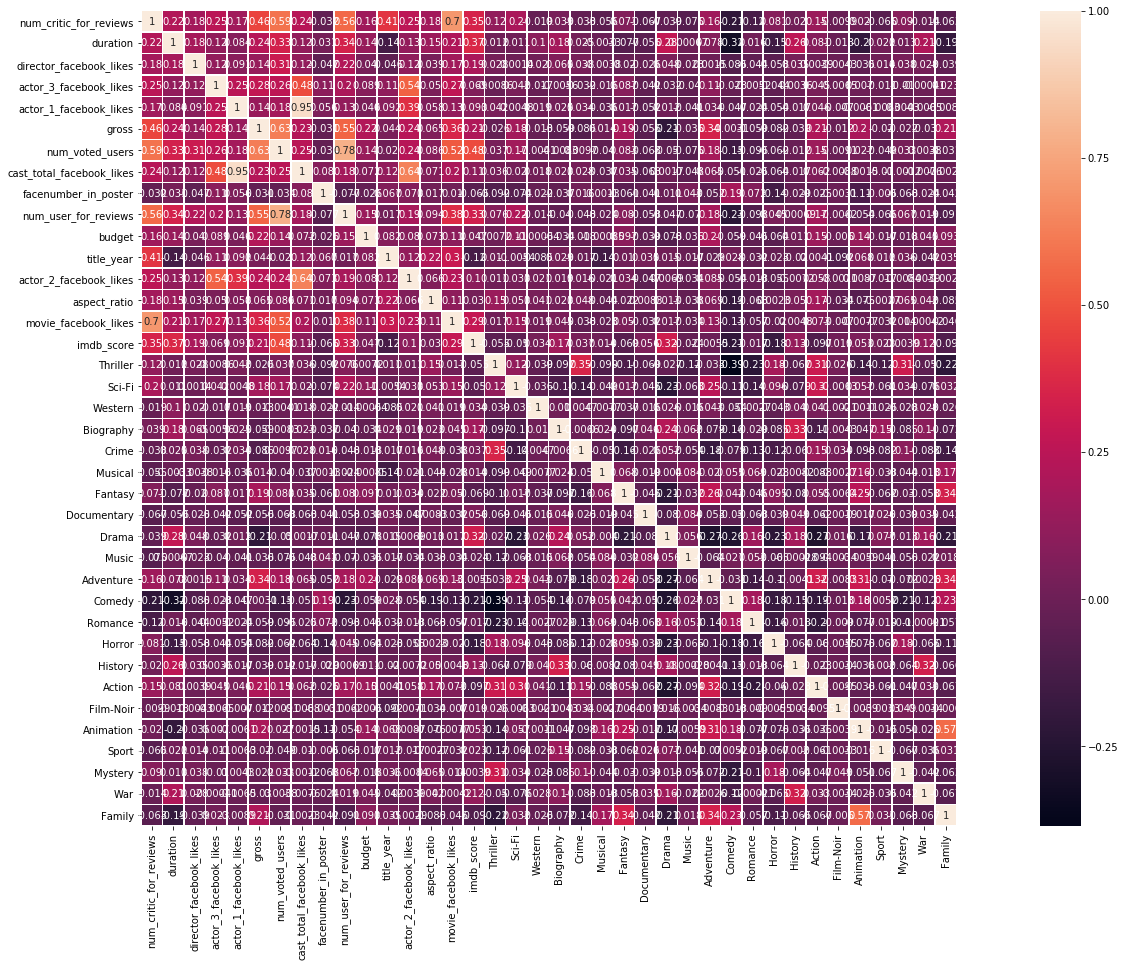

In [124]:
#Visualize this data
correlational_matrix= data.corr(method='pearson')
plt.figure(figsize=(30,15))
seaborn.heatmap(correlational_matrix, vmax=1, linewidths=0.5, square=True, annot=True)

__Now looking at this heatmap, we search for attributes of our dataset that are the darkest since they aren't important for
the analysis.__ <br>
The attributes aspect_ratio, facenumber_in_poster, and title_year are fairly dark - let's remove them.
Let's also remove the genres because they are all dark as well.

In [125]:
data.drop('aspect_ratio', axis=1, inplace=True)
data.drop('facenumber_in_poster', axis=1, inplace=True)
data.drop('title_year', axis=1, inplace=True)
#data.drop('History', axis=1, inplace=True)
#data.drop('Mystery', axis=1, inplace=True)
#data.drop('Adventure', axis=1, inplace=True)
#data.drop('Action', axis=1, inplace=True)
#data.drop('Fantasy', axis=1, inplace=True)
#data.drop('Family', axis=1, inplace=True)
#data.drop('Crime', axis=1, inplace=True)
#data.drop('Drama', axis=1, inplace=True)
#data.drop('Sport', axis=1, inplace=True)
#data.drop('Animation', axis=1, inplace=True)
#data.drop('Documentary', axis=1, inplace=True)
#data.drop('Biography', axis=1, inplace=True)
#data.drop('Horror', axis=1, inplace=True)
#data.drop('Romance', axis=1, inplace=True)
#data.drop('Music', axis=1, inplace=True)
#data.drop('Comedy', axis=1, inplace=True)
#data.drop('War', axis=1, inplace=True)
#data.drop('Sci-Fi', axis=1, inplace=True)
#data.drop('Thriller', axis=1, inplace=True)
#data.drop('Western', axis=1, inplace=True)
#data.drop('Film-Noir', axis=1, inplace=True)
#data.drop('Musical', axis=1, inplace=True)
data.shape

(3700, 35)

__There are 8 lighter attributes that are relevent from the data shown above including the 'imdb_score' attribute. <br>
Let's visualize them, splitting them into 3 categories - $$, cast, and reviews.__

In [126]:
plot_money = data
plot_likes = data
plot_reviews = data

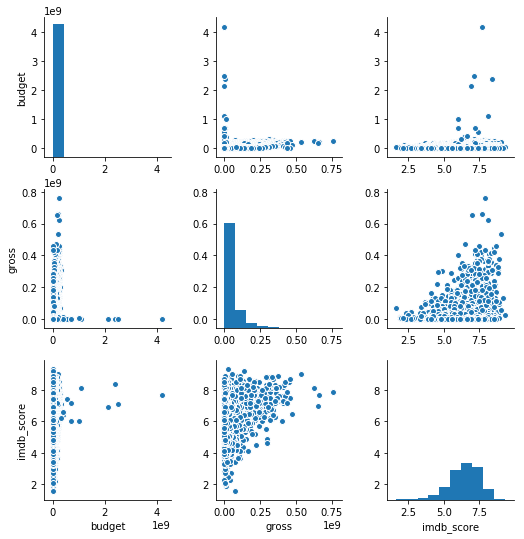

In [127]:
#Let's start with the $$$ - budget, gross, and imdb_score
money = ['budget', 'gross', 'imdb_score']
seaborn.pairplot(plot_money[money])

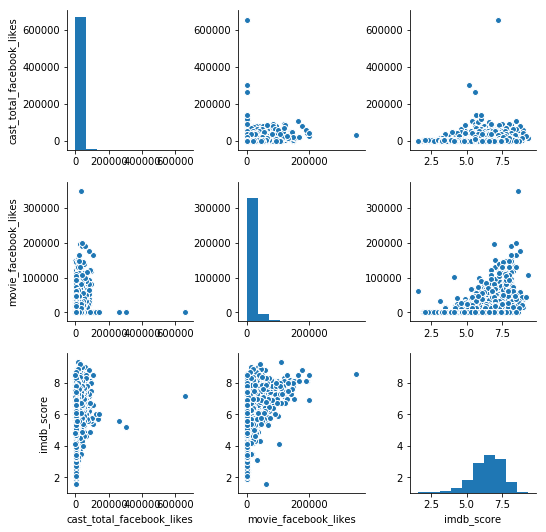

In [128]:
#Now, movie likes.
likes = ['cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score']
seaborn.pairplot(plot_likes[likes])

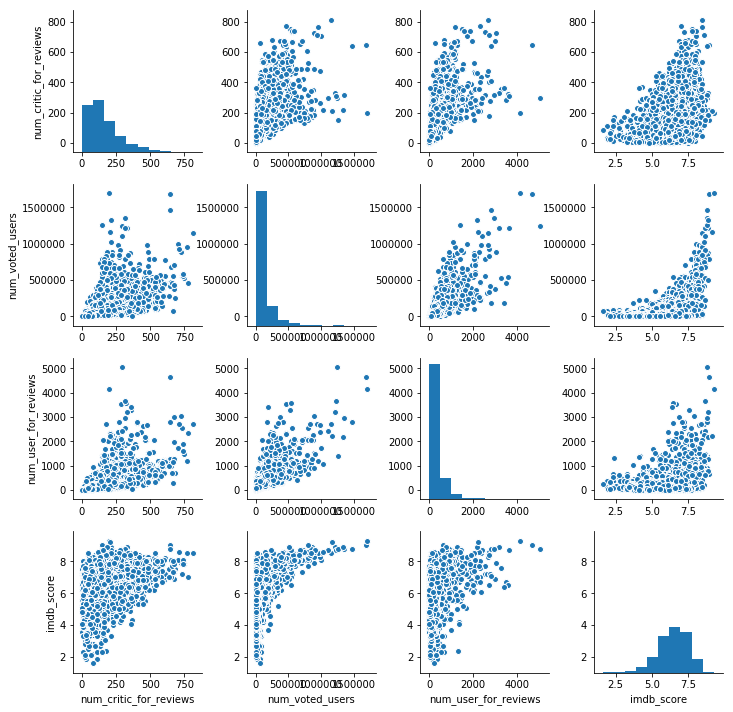

In [129]:
#Lastly, reviews.
reviews = ['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'imdb_score']
seaborn.pairplot(plot_reviews[reviews])

__<center> <h1> MACHINE LEARNING INCORPORATION </h1> </center> __

In this part, we will be using the KNN, Logistic Regression, and Random Forests algorithms to predict IMDB scores.

In [130]:
train, dev = train_test_split(data, test_size=0.2,random_state=4)
X_train = train.iloc[:,0:len(data.columns)-1]
Y_train = [int(0.5 * math.floor(2.0 * x)) for x in train['imdb_score']]
X_dev  = dev.iloc[:,0:len(data.columns)-1]
Y_dev = [int(0.5 * math.floor(2.0 * x)) for x in dev["imdb_score"]]

In [131]:
acc = 0
wrong = 0 
for i in range(0,len(results)):
    if results[i] == Y_dev[i]:
        accu +=1
    else:
        wrong +=1

In [132]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state =42)

In [133]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,Y_train)
knnPredict = knn.predict(x_test)
knnScore = accuracy_score(y_test, knnPredict)
print(knnScore)

0.435810810811


In [134]:
dt = DecisionTreeClassifier(random_state = 2)
dt.fit(X_train, Y_train)
dectreePredict = dt.predict(x_test)
dectreeScore = accuracy_score(y_test, dectreePredict)
print(dectreeScore)

1.0


In [135]:
randomforest = RandomForestClassifier(n_estimators=15)
randomforest.fit(X_train, Y_train)
forestPredict = randomforest.predict(x_test)
forestScore = accuracy_score(y_test, forestPredict)
print(forestScore)

1.0


__Looking at these predictions, we see KNN has a pretty accurate representation of 45%. 
But some reason, the decision tree and random forests classifiers predict almost 100% accuracy.
Although we can't be certain that these predictions are precise, it's a good start of seeing what we can do.__

<h1>__CONCLUSION__ </h1>

This project was to predict scores given values from an IMDB movie dataset that was extremely large. 
To recap what I did, I first:
- imported the csv
- cleaned up the data (remove duplicates, remove NaN attributes, and irrelevant/garbage data - off inference)
- and dropped columns that weren't going to relate to the prediction of the IMDB score (such as content_rating)
From there, I set up some charts and maps for Visualization of the data in order for me to see if there was some things we can scrap - facenumber_in_poster, aspect_ratio, etc. 
In order for a successful prediction, there needs to be cleaned up data so that when it's minimized, it'll be easier to work with. After using heatmap and pairplots, we were able to see what had low correlation with what and then dropped those respective columns.
From there, our prediction algorithms began in the Machine Learning section - KNN, Decision Trees and Random Forests.
Unfortunately, aside from KNN, I do not think these predictions were accurate as they were close to 100%. 
If I had more time, I would try to clean the dataset even more and incorporate different Machine Learning algorithms and compare them to each other and see at what checkpoint I get to. Also, maybe once predictions are accurate, there can be recommendations for similar scores in different categories by using cosine similarity just like in the word2vec assignment.

After the course of this semester while working on this project, my ability to code in Python and using Jupyter got better. That along with my understanding of Machine learning algorithms grew as well. 

Useful Resources I used in order to do this project (AKNOWLEDGEMENTS): <br>
http://sci2s.ugr.es/keel/pdf/algorithm/articulo/1985-IEEE_TSMC-Keller.pdf
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://seaborn.pydata.org/generated/seaborn.pairplot.html
https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567